Missing Values Summary:
Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64

Percentage of Missing Values:
Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


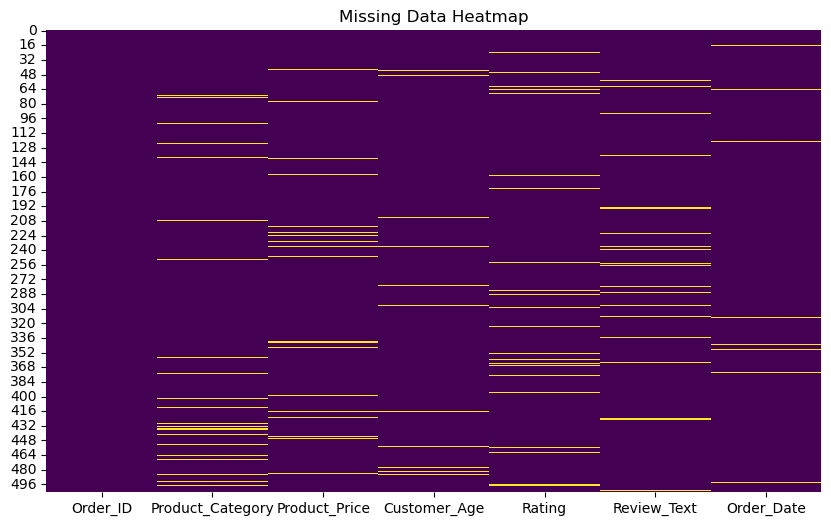

C:\Users\palla\AppData\Local\Temp\ipykernel_15492\211221174.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
C:\Users\palla\AppData\Local\Temp\ipykernel_15492\211221174.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav


Summary Statistics After Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000    3588.000000     54.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000


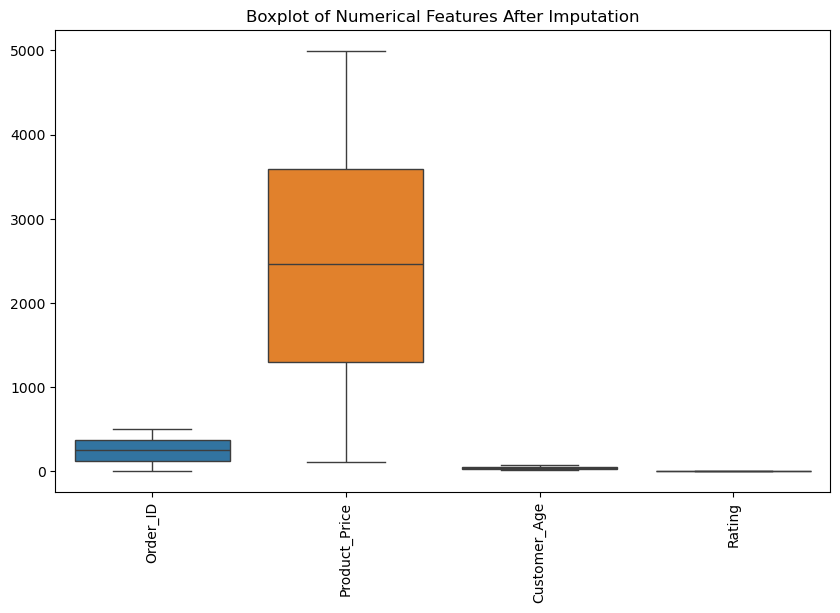

Data Cleaning Completed. Cleaned dataset saved as 'cleaned_ecommerce_data.csv'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load dataset (replace 'ecommerce_data.csv' with actual file name)
df = pd.read_csv("ecommerce_data.csv")

# Identify missing values
print("Missing Values Summary:")
print(df.isna().sum())
print("\nPercentage of Missing Values:")
print(df.isna().mean() * 100)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling missing values
# Mean/Median imputation for numerical columns
if 'Product_Price' in df.columns:
    df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)

# Mode imputation for categorical columns
if 'Product_Category' in df.columns:
    df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

# Forward fill or backward fill for date fields
if 'Order_Date' in df.columns:
    df['Order_Date'].fillna(method='ffill', inplace=True)

# KNN Imputation for complex cases
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=[np.number])), 
                          columns=df.select_dtypes(include=[np.number]).columns)
df.update(df_imputed)

# Compare summary statistics before and after imputation
print("\nSummary Statistics After Imputation:")
print(df.describe())

# Visualizing Imputed Values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features After Imputation")
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_ecommerce_data.csv", index=False)

# Display completion message
print("Data Cleaning Completed. Cleaned dataset saved as 'cleaned_ecommerce_data.csv'")
